In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Make mock stock returns with weak correlations

In [2]:
# N stocks in T trading days
N = 300
T = 2000

mean = np.zeros(N)

# Arbitrarily simple covariance matrix generation
A = np.random.rand(N, N)
B = np.dot(A, A.transpose())
cov = 5*B/np.max(B)
# Just guarantee the covariance matrix is symmetric, regardless of generation
cov = 0.5*(cov + cov.T)

# simulated returns from known covariance and mean
pts = np.random.multivariate_normal(mean, cov, size=T)

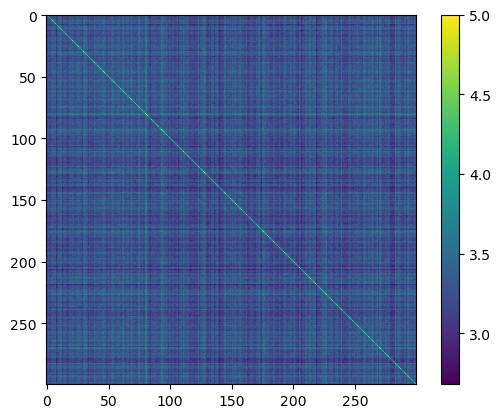

In [3]:
plt.imshow(cov)
plt.colorbar()
plt.show()

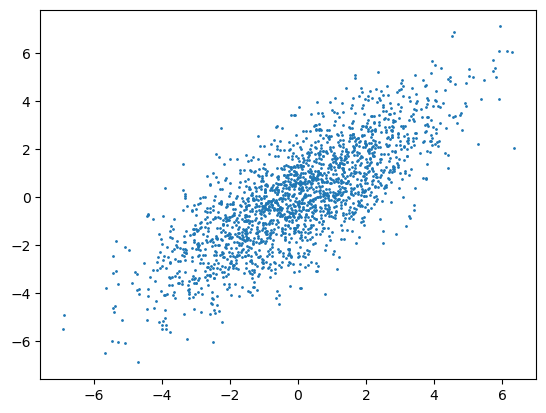

In [4]:
plt.scatter(pts[:, 9], pts[:, 44], s = 1)
plt.show()

In [5]:
%%time
test = np.zeros(shape = (N, N))
for i, j in list(itertools.combinations(np.arange(N), 2)):
    test[i, j] = np.sum((pts[:, i] - np.mean(pts[:, i]))*(pts[:, j] - np.mean(pts[: j])))/T

test = np.where(test,test,test.T) #convert upper triangular to symmetric
for i in range(N):
    test[i, i] = np.std(pts[:, i])**2

CPU times: total: 2.05 s
Wall time: 2.19 s


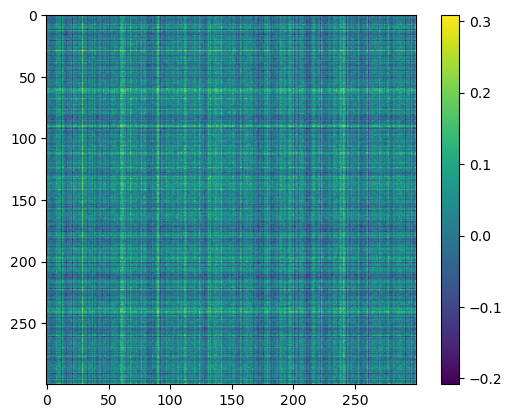

In [6]:
# difference in correlations
plt.imshow((test-cov))
plt.colorbar()
plt.show()

# Start knocking out random days

In [7]:
# Make a fresh copy of mock data
pts2 = pts.copy() 


In [8]:
# Make a mask by generating a random array (same shape as returns array) and set a threshold
mask_base = np.random.randn(T, N)


In [9]:
# Mask out random points (default has 15% null fraction, but can adjust and recheck with other thresholds)

pts2[mask_base >1] = np.nan

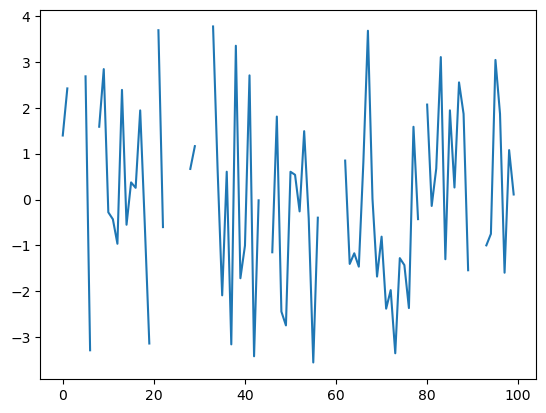

In [10]:
# Check that some dates are erased

plt.plot(pts2[:100, 1])
plt.show()

In [11]:
%%time
test2 = np.zeros(shape = (N, N))
for i, j in list(itertools.combinations(np.arange(N), 2)):
    row_mask = (~np.isnan(pts2[:, i]))&(~np.isnan(pts2[:, j]))
    pi = pts2[:, i][row_mask]
    pj = pts2[:, j][row_mask]
    test2[i, j] = np.sum((pi - np.mean(pi))*(pj - np.mean(pj)))/len(pi)
    #print(i, j)
    
test2 = np.where(test2,test2,test2.T)
for i in range(N):
    test2[i, i] = np.nanstd(pts2[:, i])**2

CPU times: total: 2.19 s
Wall time: 2.27 s


### sidenote
 
I mentioned the NaN-statistic commands like `np.nanmean` and `np.nanstd` which calculate associated statistics, ignoring `NaN` entries from the array. 

While you can use them, it is often faster to use boolean masks like in the code above (I briefly tested it, and it's about 5 times faster execution).

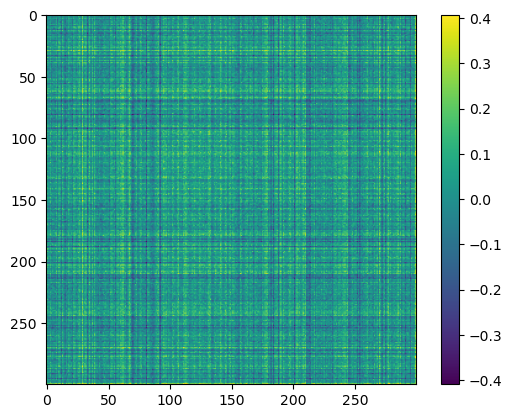

In [12]:
plt.imshow((test2 - cov))
plt.colorbar()
plt.show()

In [13]:
# Test of similarity by Frobenius norm

diffTest = cov-test
diffTest2 = cov-test2

print(np.linalg.norm(diffTest)/np.sqrt(N*T), np.linalg.norm(diffTest)/np.linalg.norm(cov))
print(np.linalg.norm(diffTest2)/np.sqrt(N*T), np.linalg.norm(diffTest2)/np.linalg.norm(cov))


0.026122505153133656 0.020500389211120698
0.040358463742818394 0.03167246823536101


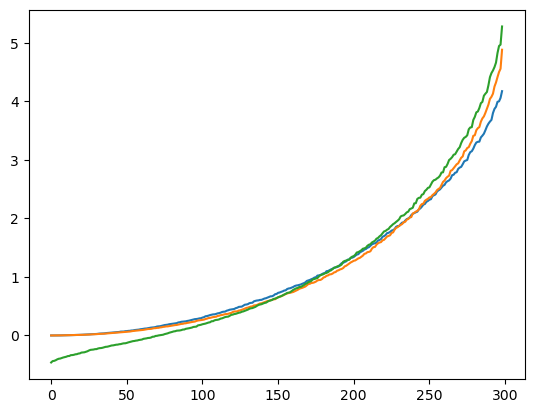

In [14]:
# Test of similarity in Eigenvalues

eCov = np.linalg.eig(cov)[0]
eTest = np.linalg.eig(test)[0]
eTest2 = np.linalg.eig(test2)[0]

plt.plot(np.sort(eCov)[:-1])
plt.plot(np.sort(eTest)[:-1])
plt.plot(np.sort(eTest2)[:-1])
plt.show()